# Linear regression bike sharing assignment 
    Submitted by Asmar Zia

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### The company wants to know
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands 


### Objective
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Step 1 : Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


### Step 2 : Loading data and understanding

In [2]:
# loading and looking at top 5 rows of the data 
bikeSharing_db = pd.read_csv('bikesharing.csv')
bikeSharing_db.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# shape of the data 
bikeSharing_db.shape

(730, 16)

In [4]:
# check for null values and data types of all columns
bikeSharing_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# loading all column names 
bikeSharing_db.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# describing all numerical values
bikeSharing_db.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Post evaluting the data we have 730 rows and 16 columns with no null values in any of the columns

### Step 3 : Data Cleaning
3.1 Drop columns that are not needed

- `instant` is row identifier.
- `dteday` is removed becasue we have date columns such as `mnth` and `year` and `weekday` already 
- `casual` and `registered` as they are added to become the `cnt` variable

In [7]:
#let us introduce a days_old for how old is the business
bikeSharing_db['days_old'] = (pd.to_datetime(bikeSharing_db['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [8]:
# Dropping columns discussed above and inspecting the data
bikeSharing_db.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [9]:
bikeSharing_db.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [10]:
bikeSharing_db.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [11]:
bikeSharing_db.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
bikeSharing_db.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [13]:
bikeSharing_db.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [14]:
bikeSharing_db.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [15]:
# Since there are no missing values in the data lets check for outliers
bikeSharing_db.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [16]:
bikeSharing_db.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

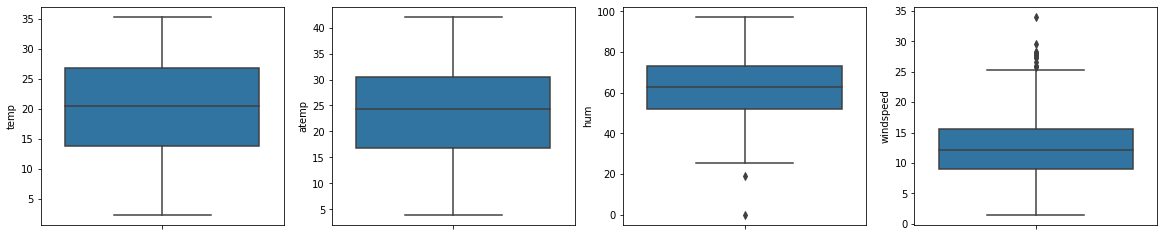

In [17]:
# box plots for columns with continous variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_db)
    i+=1

We can see no outliers hence moving to EDA section

### Step 4 : EDA

In [18]:
# Lets 1st convert season and weather to categorical variables
bikeSharing_db.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_db.weathersit.replace({1:'clear',2:'cloudy',3:'rainy',4:'thunderstorm'},inplace = True)

bikeSharing_db.mnth = bikeSharing_db.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_db.weekday = bikeSharing_db.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_db.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

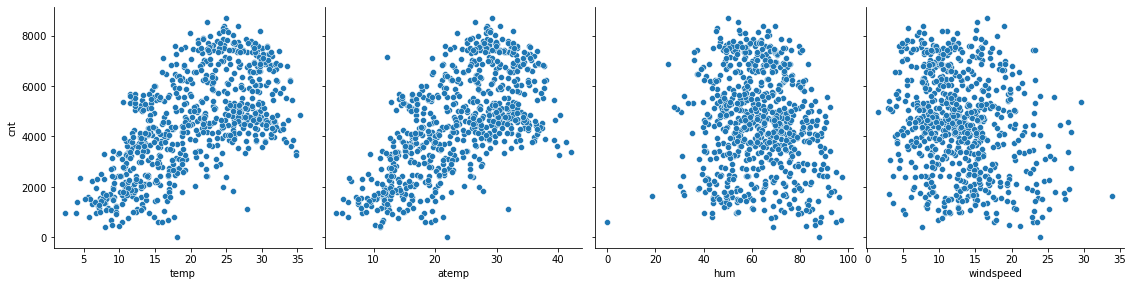

In [19]:
# Now we should draw a scatter plot to see the linear relationship
plt.figure(figsize = (15,30))
sns.pairplot(bikeSharing_db, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

Inference :
1. Atemp and temp have best linear relationship with Cnt 
2. Atemp and temp are also highly correlated as seen from the above correlation matrix 

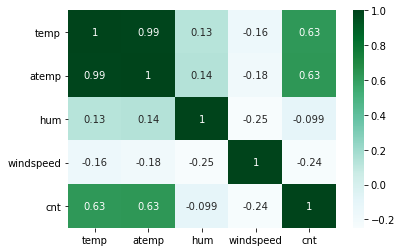

In [20]:
# Checking correlations in a heat map
sns.heatmap(bikeSharing_db[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

As we can see atemp is 0.99 corr to temp.so we can drop atemp

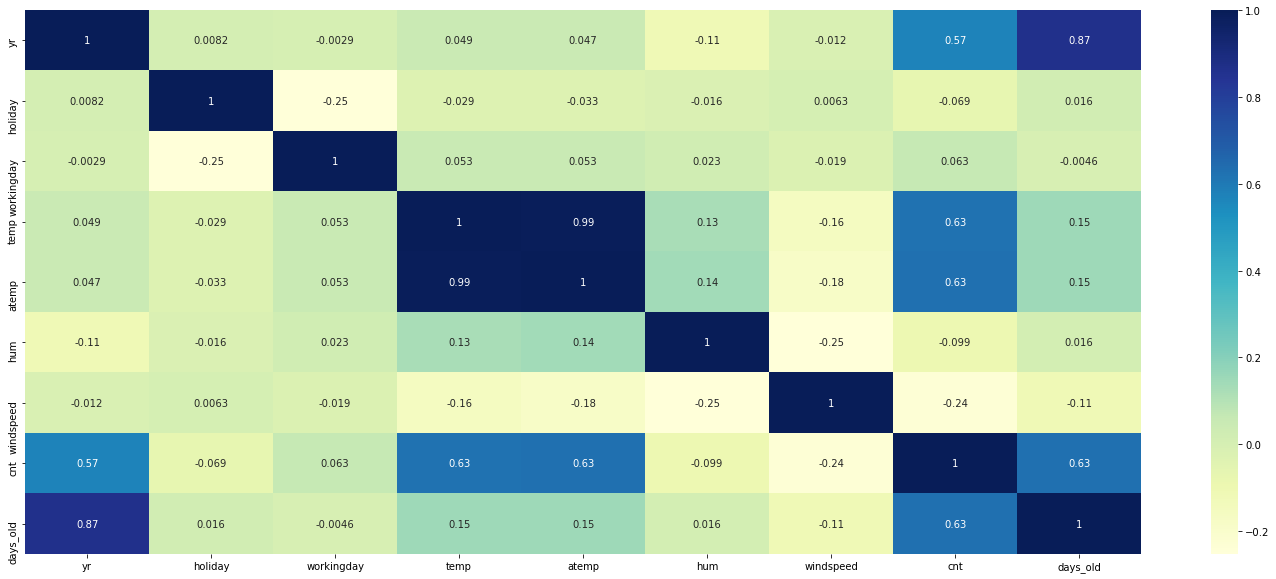

In [21]:
# checking corr for all numercial variables
corr =bikeSharing_db.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

Lets now analyze all the categorical variables with target variable

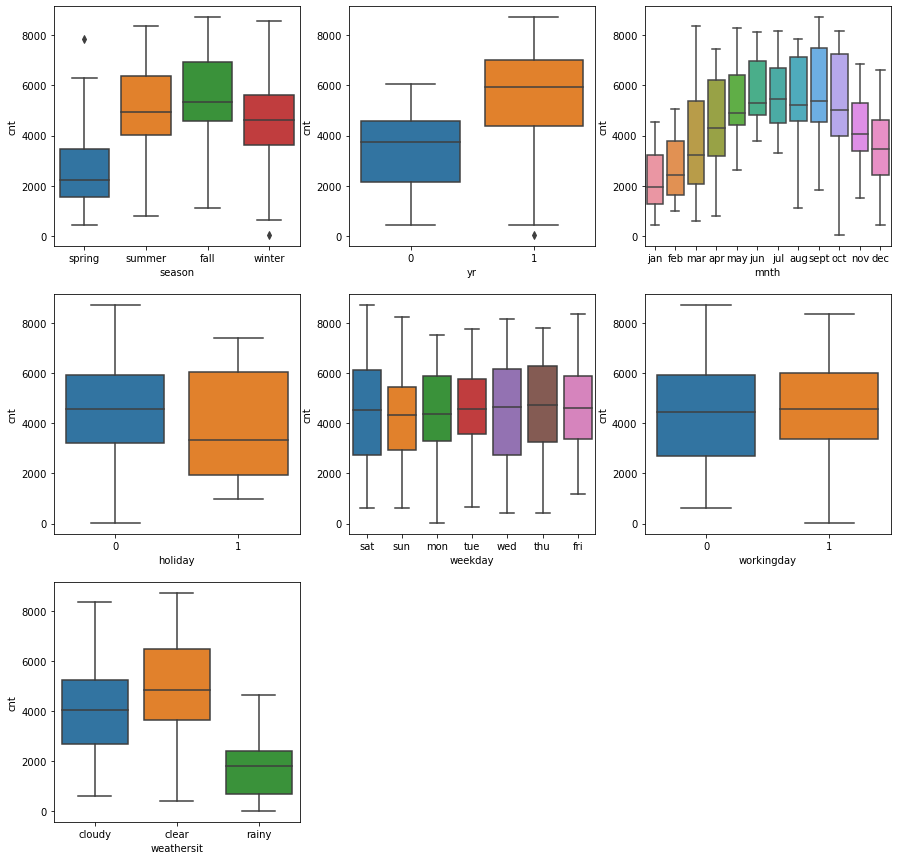

In [22]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_db, x=i[1], y='cnt')
plt.show()

Inference:
Here many insights can be drawn from the plots

1. Fall has highest demand for rental bikes
2. Demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand post septtember demand is decreasing
4. Holida has positive effect in the demand.
6. The clear weathershit has highest demand

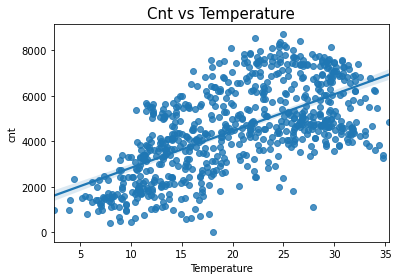

In [23]:
# let look at the reg plot of independent variables and cnt our dependent variables
plt.title("Cnt vs Temperature",fontsize=15)
sns.regplot(data=bikeSharing_db,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()


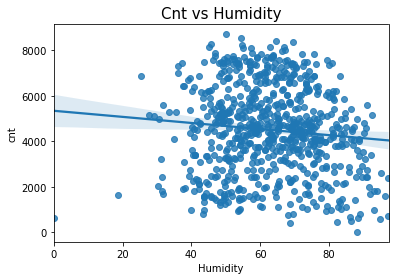

In [24]:
plt.title("Cnt vs Humidity",fontsize=15)
sns.regplot(data=bikeSharing_db,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Insight
We can see that temp has a more linear relationship with our target variable as compared to hum as its values are scattered around.

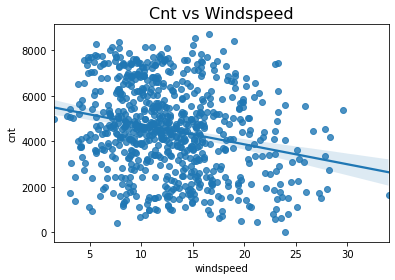

In [25]:
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_db,y="cnt",x="windspeed")
plt.show()

Insight :
- Windspeed is again scattered
- Though high windspeed lead to low cnt

### Step 5 : Data preparation for linear regression

In [26]:
# lets create dummy varibales (n-1) for categorical variables 
bikeSharing_db_new = bikeSharing_db
bikeSharing_db_new = pd.get_dummies(data=bikeSharing_db_new,columns=["season","mnth","weekday"], drop_first=True)
bikeSharing_db_new = pd.get_dummies(data=bikeSharing_db_new,columns=["weathersit"])

In [27]:
# lets print the columns after creating the dummies
bikeSharing_db_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_rainy'],
      dtype='object')

In [28]:
bikeSharing_db_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,1,0,0


### Step 6 : Model Building phase
#### 6.1 : Split the data into training and test

In [29]:
bikeSharing_db_new.shape

(730, 32)

In [30]:
# Creating dependent variable
y =  bikeSharing_db_new.pop('cnt')

# remaining all the variables are independent variables
x =  bikeSharing_db_new

# creating train and test data sets with 70:30 rule
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_rainy
683,1,0,1,13.188347,16.22460,62.0417,10.250129,683,0,0,...,0,0,0,0,1,0,0,0,1,0
645,1,1,0,15.716653,19.38040,70.9583,12.708493,645,0,0,...,0,1,0,0,0,0,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,163,0,1,...,0,1,0,0,0,0,0,1,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,360,1,0,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,640,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
# shape of train and test data set
print(x_test.shape)
print(x_train.shape)

(219, 31)
(511, 31)


#### 6.2 : Scaling continous variables
##### temp, hum and wind are continous and need to be scaled

In [33]:
# Importing required library
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [34]:
# scale training data set
cont_var = ['temp','atemp','hum','windspeed','days_old']
scaler = MinMaxScaler()
x_train[cont_var] = scaler.fit_transform(x_train[cont_var])

In [35]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_rainy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.346380,0.029354
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.476282,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_rainy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,1,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,1,0


#### 6.3 : First lets build a model using RFE

In [37]:
# linear regression model using sklearn
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [38]:
# lets use rfe to cut select upto 15 features
rfe = RFE(lm,15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(),n_features_to_select=15)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [39]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', False, 3),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 9),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 7),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 16),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_rainy', True, 1)]

### 6.4 Creating a Funtion for model and VIF 

In [40]:
# Below funtion to be used for model build
def model_func(col):
    x_train_sm =sm.add_constant(x_train[col])
    lr = sm.OLS(y_train,x_train_sm).fit()
    print(lr.summary())
    return lr

In [41]:
# below funtion is to calculate vifs and print them
def vifs(col):
    df1 = x_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [42]:
# columns that got selected using rfe
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_cloudy', 'weathersit_rainy'],
      dtype='object')

In [43]:
# columns that we not selected using rfe
x_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [44]:
# lets start with columns taken by rfe
x_train_rfe = x_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_cloudy', 'weathersit_rainy']]

In [45]:
x_train_rfe.shape

(511, 15)

### 6.5 Building models now
1. Model 1 : Using columns selected by rfe

In [46]:
# using columns selected by rif
col = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_cloudy', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          6.89e-186
Time:                        01:12:42   Log-Likelihood:                -4129.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1704.1558    216.59

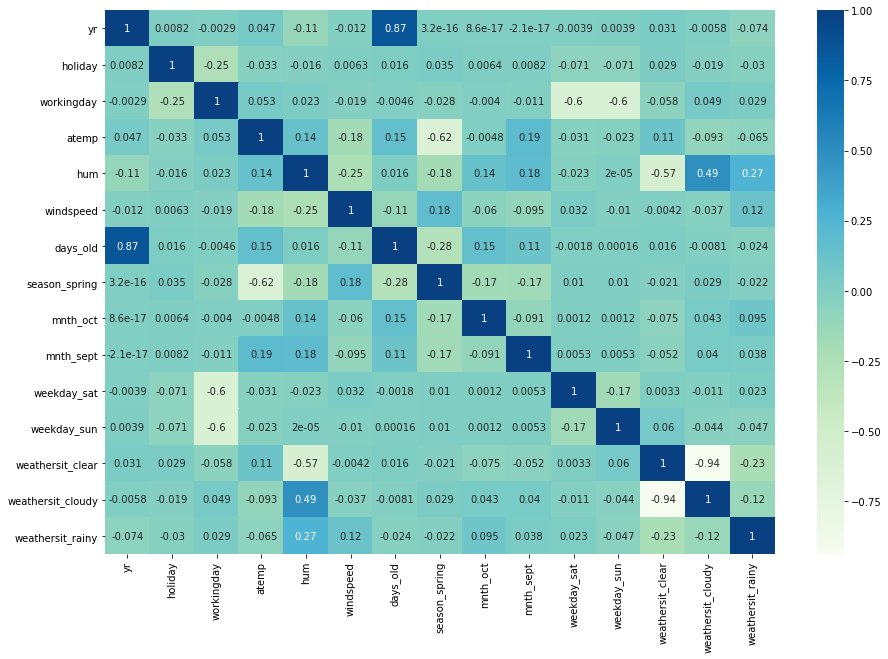

In [47]:
# lets check the correlation of columns selected by RFE since we have inf VIF for some of them with the
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_db_new[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_cloudy', 'weathersit_rainy']].corr(), cmap='GnBu', annot=True)
plt.show()

### 
2. Model 2

In [48]:
# lets drop column cloudy since it highly correlated with clear and also days old due to high VIF and correlation with yr
col = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.6
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          2.67e-186
Time:                        01:12:43   Log-Likelihood:                -4131.7
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     498   BIC:                             8344.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2249.9376    258.942  

###
3. Model 3:

In [49]:
# high VIF observed for Working day and sat, sun due to correlation and based on the box plots lets keep sat only and also replace atemp with temp to see if any diff
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.00e-185
Time:                        01:12:43   Log-Likelihood:                -4133.0
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     498   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2796.1073    331.753  

#### This is a better model since have reduces the VIF for working and and also the p values for variables are better

4. Model 4

In [50]:
# hum has high VIF and is negative cofficent lets remove it
col = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.27e-183
Time:                        01:12:43   Log-Likelihood:                -4140.8
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1737.7544    196.214  

### 
5. Model 5

In [52]:
# RIF only selected on season lets add other seasons as well for more variations
col = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring','season_summer', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.24e-184
Time:                        01:14:11   Log-Likelihood:                -4132.9
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1002.1668    286.690  

#### A better since it has more variables and not too much effect in p values or VIF 

6. Model 6 :

In [53]:
# lets drop holiday since it has -ve coeff and high p-value
col = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring','season_summer', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          4.89e-185
Time:                        01:21:06   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              932.2385    284.994  

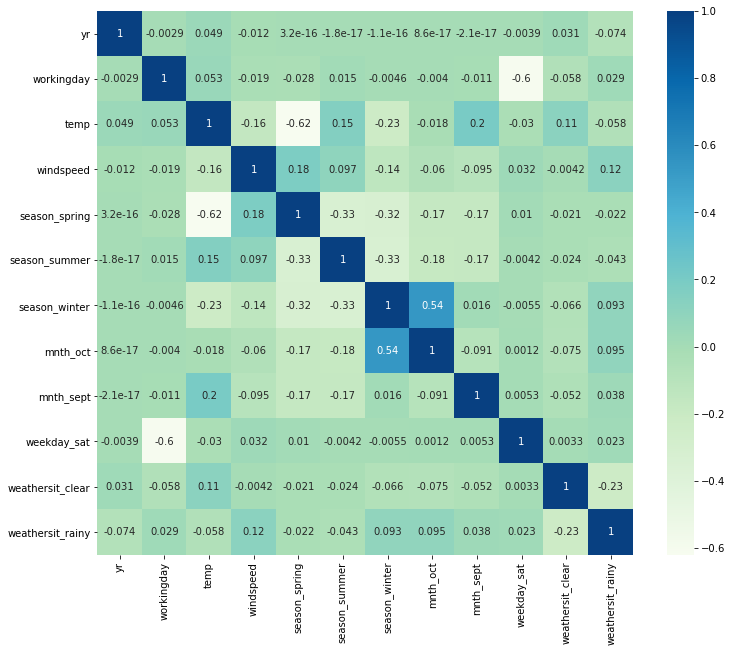

In [54]:
# Lets check correaltion of current columns since it is the most stable with all p values < 5%
plt.figure(figsize = (12,10))
sns.heatmap(bikeSharing_db_new[['yr', 'workingday', 'temp', 'windspeed',
       'season_spring','season_summer', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']].corr(), cmap='GnBu', annot=True)
plt.show()

###

7. Model 7

In [55]:
# Lets remove season spring since it has high -ve coeff and high correl with temp
col = ['yr', 'workingday', 'temp', 'windspeed',
       'season_summer', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.74e-181
Time:                        01:25:14   Log-Likelihood:                -4145.9
No. Observations:                 511   AIC:                             8316.
Df Residuals:                     499   BIC:                             8367.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -144.7165    174.911  

#### The above model is not stable since it has -ve constant with high p value

8. Model 8 :

In [56]:
# lets add spring back and remove temp since the both were highly correlated
col = ['yr', 'workingday', 'windspeed',
       'season_spring','season_summer', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          4.41e-158
Time:                        01:33:19   Log-Likelihood:                -4201.3
No. Observations:                 511   AIC:                             8427.
Df Residuals:                     499   BIC:                             8477.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3862.4024    173.984  

### R sq has reduced but VIF for all are under 5 and also good p values except summer season

9. Model 9 :

In [57]:
# removing summer due to high p value 
col = ['yr', 'workingday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.23e-158
Time:                        01:37:46   Log-Likelihood:                -4202.7
No. Observations:                 511   AIC:                             8427.
Df Residuals:                     500   BIC:                             8474.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3762.6388    163.368  

#### This is the most stable model yet

10 Model 10:

In [58]:
# lets remove windspead and working with temp since they are now highest in VIF and windspead has high -ve coeff
col = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          3.04e-178
Time:                        01:42:50   Log-Likelihood:                -4159.2
No. Observations:                 511   AIC:                             8338.
Df Residuals:                     501   BIC:                             8381.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1424.8150    205.120  

#### With one less variabel we have increase Rsq to 81% and VIF are all less the 4 now. Currently the best model 

11. Model 11: 

In [59]:
# replacing sat with sun since sat has high p value and both were equally correlated with working day
col = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_oct', 'mnth_sept', 'weekday_sun',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.0
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.03e-180
Time:                        01:46:36   Log-Likelihood:                -4153.4
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     501   BIC:                             8369.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1523.8425    201.815  

###
12. Model 12 :

In [60]:
# replacing oct with Jul since it has the least variance in box plots and oct highest
col = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun',
       'weathersit_clear', 'weathersit_rainy']

model_func(col)
vifs(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          2.33e-179
Time:                        01:50:27   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1183.9266    205.851  

### Final takeaway 
#### The above model is our final model for the below reasons
1. We have achieved almost 0 p-value for all the variables
2. VIF is less then 4 for all the variables 
3. We have high Rsq and Adj Rsq of 82% along with high F-statistics

#### Model build using Sklearn

In [61]:
# function for sklean model
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

lr_sklearn = build_model_sk(x_train[col],y_train)
print(lr_sklearn.intercept_,lr_sklearn.coef_)

1183.9266238863106 [ 2001.88568746  3917.73381585 -1170.12801426   494.76805882
  -482.89359595   483.00061976  -335.8335287    665.38449026
 -1639.93914907]


### Step 7 : Evaluating the model

1. Residual analysis

In [62]:
y_train_pred = lr_sklearn.predict(x_train[col])

In [63]:
# histogram of the error terms
def res_dist(actual, pred):
    sns.displot(actual-pred)
    plt.title('Error terms')
    plt.xlabel('Errors')

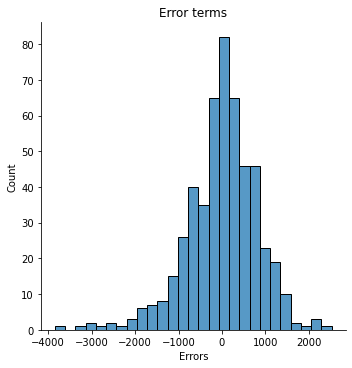

In [64]:
res_dist(y_train,y_train_pred)

#### We can see error terms are distibuted normally with 0 mean. Good to proceed

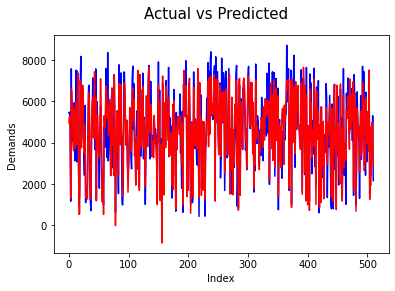

In [65]:
# Lets compare actual and predicted values 
x = [i for i in range(0,len(x_train),1)]
plt.plot(x,y_train, color="blue")
plt.plot(x,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

we can see that actual and predicted terms follow similar patern 

In [66]:
# Checking the Rsquare with the predicted and actual
r2_score(y_train,y_train_pred)

0.8185359364498817

R sq is same as what we have recieved in the final model

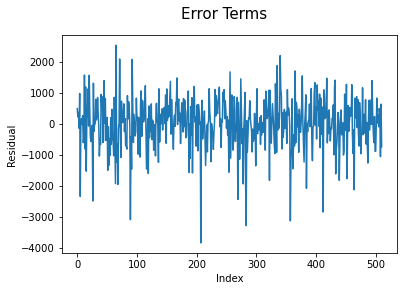

In [67]:
# check error terms
x = [i for i in range(0,len(x_train),1)]
plt.plot(x,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residual')
plt.show()

Error terms are independent

### 2. Check linearity

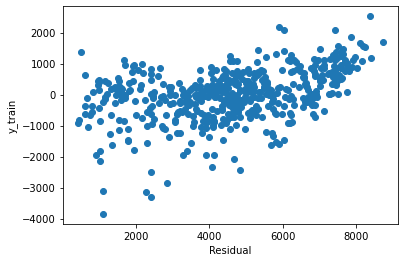

In [68]:
# using scatter plot
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 3. Predict values on the test data set

In [69]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [70]:
final_col = ['yr', 'temp',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun',
       'weathersit_clear', 'weathersit_rainy']

# predict values using Test data
y_test_pred = lr_sklearn.predict(x_test[final_col])

### 4. Rsq for predicted values on test data set

In [71]:
r2_score(y_test,y_test_pred)

0.8159036088393238

#### We have again very close Rsq compared to the train data set which tells the model is working great even for test data 

### 5 : Homoscedacity

Text(0, 0.5, 'y_test_pred')

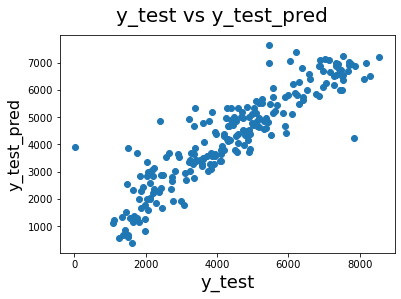

In [72]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

In [73]:
# Plotting actual and predicted values for test data
def plot_act_pred(act,pred,scale,dataname):
    x = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(x,act, color="blue", linewidth=2, linestyle="-")
    plt.plot(x,pred, color="red",  linewidth=2, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20) 
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts', fontsize=16)                              

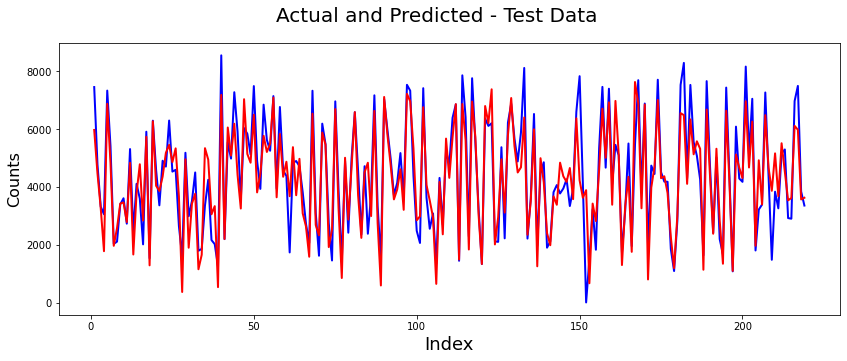

In [74]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [75]:
# Error terms for test data
def plot_err_terms(act,pred):
    x = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(x,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)           
    plt.xlabel('Index', fontsize=18)                    
    plt.ylabel('Counts - Predicted Counts', fontsize=16)

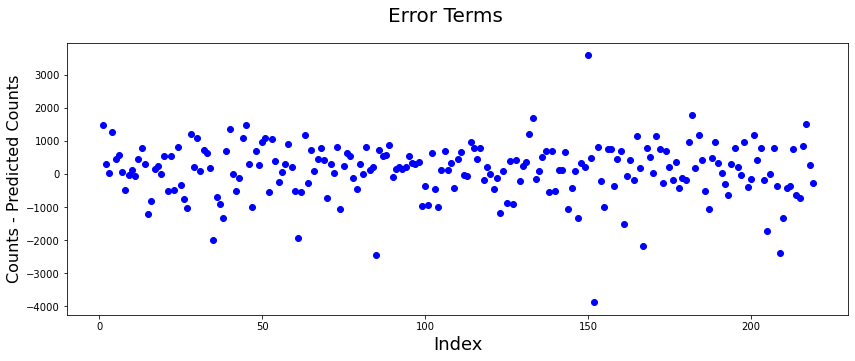

In [76]:
plot_err_terms(y_test,y_test_pred)

### Inference 
1. Variance of Residuals is constant across predictions hence it does not vary much
2. Predicted values of test data set are very close to the actual 
3. Error terms are randomly distrubuted. Hence we can infer that output is well explained

### Final Step : Interpeting the final model and conclusion


In [77]:
# build the final model 

Final_model = model_func(final_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          2.33e-179
Time:                        23:37:35   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1183.9266    205.851  

### Final interpretation of results
#### Analysing the above model, the comapany should focus on the following features:
1. Spring is the season the company is fallinf short and should focus on expanding during this    season
2. During September company can expect to have maximum bookings and should be focused in campaigns
3. We can expect to have great uptake in users once situation is normal.
4. Weather conditions will play a huge factor in number of booking, with least in rainy or snowy 

### Conclusion : The variables to predict the demand of shared bikes
1. Year (2019)
2. Temprature 
3. Humidity
4. Season (Spring,winter) 
5. Day (Sunday)
6. Weather (Clear, Rainy)
7. Months (Jan,Jul,Sep,Dec)
8. Holiday